In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thesis/ok.csv')
df['date']=pd.to_datetime(df['date'])
df.reset_index(inplace=True)


df

,index,date,Temp
0,0,2007-01-01,21.10
1,1,2007-02-01,23.15
2,2,2007-03-01,29.45
3,3,2007-04-01,32.75
4,4,2007-05-01,33.85
...,...,...,...
127,127,2017-08-01,31.85
128,128,2017-09-01,31.75
129,129,2017-10-01,31.30
130,130,2017-11-01,27.00


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Temp'],model='multiplicative', freq=12)
results.plot();

TypeError: ignored

In [ ]:
train = df.iloc[:132]
test = df.iloc[-120:]
result= df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_result = scaler.transform(result)

TypeError: ignored

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=50)

In [ ]:
fore = [1,2]
np.append(fore,5)
fore

In [ ]:
fore = []
last_train_batch = np.array(scaled_train[-12:])
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
m=model.predict(last_train_batch)
m=np.asarray(m[0])
m
np.append(fore,m)
fore

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch

In [ ]:
test_predictions = df['Temp']
test_predictions

In [ ]:
fore = []
fore[0]=1

In [ ]:
#from numpy.ma.core import append
fore = []
for i in range(23):
  last_train_batch = scaled_train[-12:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  m=model.predict(last_train_batch)
  np.append(fore,m)

fore

In [ ]:
forecast = []
for i in range(23):
  forecast.append(fore[i][0])
forecast

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

In [ ]:
forecast=scaler.inverse_transform(forecast)
future_datest_df['forecast']=true_predictions[-23:]

In [ ]:
future_df=pd.concat([df,future_datest_df])
future_df

In [ ]:

future_df[['Temp', 'forecast']].plot(figsize=(12, 8))
plt.rcParams['font.size'] = 18

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


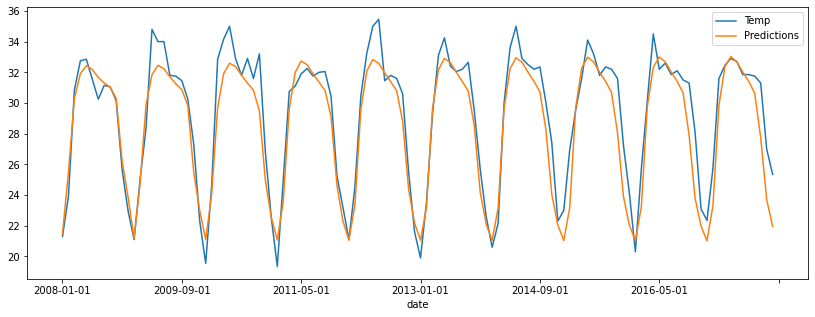

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(14,5))

In [ ]:
test

,Temp,Predictions
date,,
2008-01-01,21.30,21.483378
2008-02-01,23.90,25.471440
2008-03-01,30.85,30.279998
2008-04-01,32.75,31.914126
2008-05-01,32.85,32.432392
...,...,...
2017-08-01,31.85,31.402366
2017-09-01,31.75,30.627041
2017-10-01,31.30,27.738453


In [ ]:
forecast=test['Predictions']
forecast=forecast[-119:]
actual=test['Temp']
actual=actual[-119:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast, actual)